#### 이산형 확률분포

In [122]:
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1, 2, 3, 4, 5, 6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0 
X = [x_set, f]

In [123]:
prob = np.array([f(x_k) for x_k in x_set]) # 전체 확률...
print(prob, '\n')
dict(zip(x_set, prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

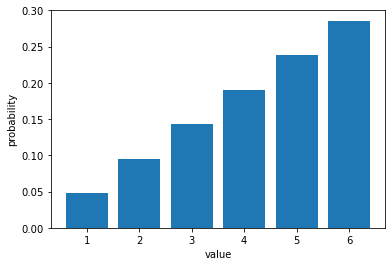

In [124]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

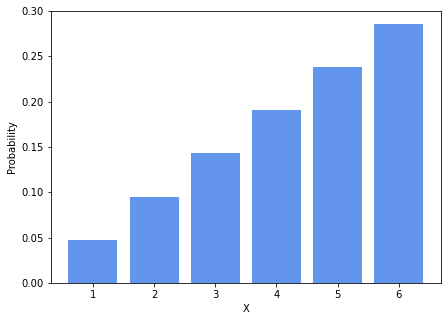

In [125]:
plt.figure(figsize=(7,5))
plt.bar(x_set, prob, color= 'cornflowerblue')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

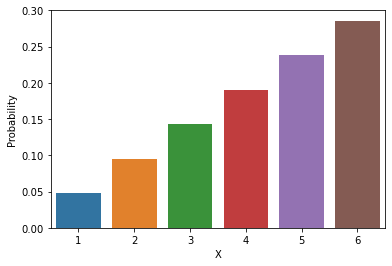

In [126]:
sns.barplot(x_set, prob)
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

In [127]:
np.all(prob>=0) # 실제 확률(당연히 양수임)

True

In [128]:
np.sum(prob)
# 확률의 총합은 1이 될 수밖에 없다!

0.9999999999999999

In [129]:
# 누적분포함수

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k<=x]) 
# n번째것까지 일단 더한값... 줌.(끝에는 1이 됨 당연함)

In [130]:
F(6)

0.9999999999999999

In [131]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 것 2x +3도 확률변수가 된다(차피 전부??? 계산될거니까??)

y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [132]:
# 1차원 이산형 확률변수의 지표
# 평균: 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되어 기댓값이라고도 부른다.

np.sum([x_k * f(x_k) for x_k in x_set]) # 확률*누적확률의 합 < 이거왜구하는거?

4.333333333333333

In [133]:
# 획률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
# 나온 값의 평균값이 그렇다는건가? 별걸다구해

sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.333224

In [134]:
# 일반화

def E(X, g=lambda x:x):
    x_set, f=X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [135]:
E(X)

4.333333333333333

In [136]:
E(X, g=lambda x:2*x+3)

11.666666666666664

In [137]:
# 기댓값의 선형성
2*E(X)+3
#동일한 값을 가지게 됨

11.666666666666666

In [138]:
# 분산

mean = E(X)
np.sum([(x_k-mean)**2 *f(x_k) for x_k in x_set])
# 편차 제곱에 누적확률값 곱함?

2.2222222222222223

In [139]:
# 일반화

def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(i)-mean)**2*f(i) for i in x_set])

In [140]:
V(X)

2.2222222222222223

In [141]:
V(X, lambda x:2*x+3)

8.88888888888889

In [142]:
# 분산의 공식

2**2*V(X)

8.88888888888889

In [151]:
# 2차원 이산형 확률분포

x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [152]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [153]:
XY = [x_set, y_set, f_XY]

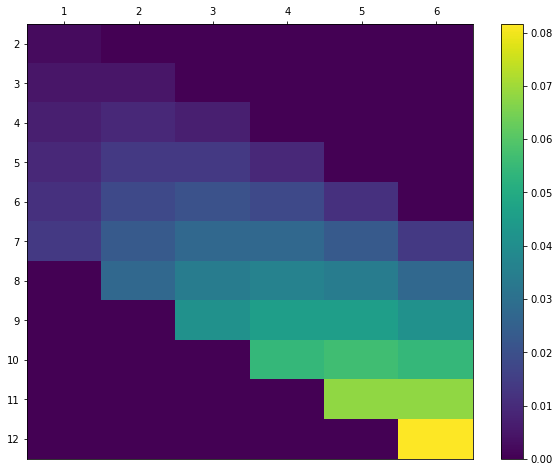

In [154]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
# Y축을 내림차순의 숫자가 되게 하여 위아래를 역전시킨다.
ax.invert_yaxis()
# X축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)     

In [155]:
np.all(prob>=0)

True

In [156]:
np.sum(prob)

1.0

In [28]:
# 주변확률분포: 확률변수 (X, Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임, 즉 확률변수 X의 확률변수를 알고 싶은 상황

In [157]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [158]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [159]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [162]:
print(X)
print(Y)

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), <function f_X at 0x000001B028A8CE50>]
[array([1, 2, 3, 4, 5, 6]), <function f_Y at 0x000001B028A8C790>]


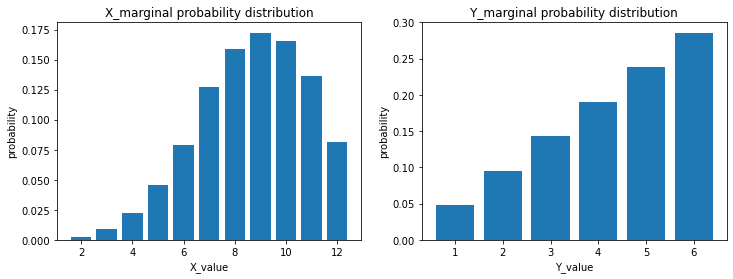

In [165]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
# ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')
# ax2.set_xticks(y_set)

plt.show()

In [166]:
# 2차원 이산형 확률분표의 지표
# 기댓값
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set
        for y_j in y_set])

8.666666666666666

In [167]:
# 다중 for문

sum=0
for y_j in y_set:
    for x_i in x_set:
        sum += x_i * f_XY(x_i, y_j)
print(sum)

8.666666666666666


In [168]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set
                   for y_j in y_set])

In [169]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [170]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

In [171]:
a, b = 2, 3

In [172]:
# 기대값의 선형성

E(XY, lambda x, y: a*x+b*y)

30.333333333333332

In [173]:
# 분산: X의 분산이라면 X에 관하여 편차 제고븨 기댓값으로 구할 수 있다.

np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set
       for y_j in y_set])

4.444444444444444

In [178]:
# 분산의 함수

def V(XY, g):
    x_set, y_set, f_XY = XY
    mean=E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j) for x_i in x_set
                 for y_j in y_set])

In [179]:
var_X = V(XY,lambda x, y: x)
var_X

4.444444444444444

In [181]:
var_Y = V(XY, lambda x, y: y)
var_Y

2.2222222222222223

In [182]:
# 공분산

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

In [183]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [184]:
V(XY, lambda x, y: a*x+b*y)

64.44444444444444

In [185]:
# 분산과 공분산의 공식

a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [186]:
# 확률변수의 상관계수: 공분산을 각각의 표준편차로 나누어 산출
cov_xy/np.sqrt(var_X*var_Y)

0.7071067811865474

#### 대표적인 이산형 확률분포

In [197]:
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linstyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])


def check_prob(X): # 확률분포를 인수로 가지면 기댓값과 분산 계열 결과를 반환
    x_set, f = X
    prob=np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum==1, f'sum of probability {prob_sum}'
    print(f'expected value {E(X): 0.4}')
    print(f'variance {V(X): 0.4}')
# arssert: 원하는 조건의 변수 값을 보증받을 때까지 테스트
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob', color='pink')
    ax.vlines(E(X), 0, 1, label='mean', color='crimson')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

#### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률

In [187]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [188]:
p=0.3
X=Bern(p)

In [192]:
check_prob(X)

expected value  0.3
variance  0.21


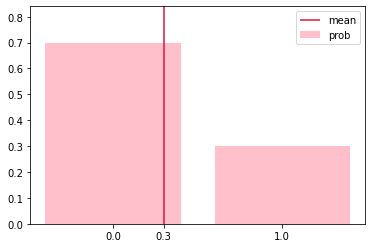

In [198]:
plot_prob(X)

In [199]:
rv = stats.bernoulli(p)

In [200]:
rv.pmf(0), rv.pmf(1) # Probability Mass Function
# 확률 질량함수

(0.7, 0.3)

In [201]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [202]:
rv.cdf([0, 1]) # Cumulative Mass Function
# 확률 누적함수 / 끝으로 갈수록 1에 가까워짐

array([0.7, 1. ])

In [109]:
rv.mean(), rv.var()

(0.3, 0.21)

#### 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

f(x) = $_{n}\mathrm{C}_{x}p^{x}(1-p)^{(n-x)}$ $(x \in \{0, 1, ..., n\}$)

      0                (otherwise)

In [110]:
# [과제] 사용자 함수

from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [ ]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포 기대값과 분산

In [ ]:
# [과제] 상기 이항분포의 확률함수와 기댓값을 시각화

In [ ]:
# [과제] 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변하는 모습을 시각화

#### 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1, 2, 3, ...\})$

      0          (otherwise)
- 기하분포의 기댓값과 분산: $E(X) = 1/p$, $V(X) = (1-p)/p^2$

In [ ]:
# [과제] 사용자 함수 구하기(단, 확률변수를 1 이상 29 이하인 정수로 설정)

def Ge(p):
    

In [ ]:
# [과제] 성공확률이 0.5일 때 기하분포의 기댓값과 분산

In [ ]:
# [과제] 상기 기하분포의 확률함수와 기댓값 시각화

In [ ]:
# [과제] 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변하는 모습을 시각화

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.

$P(X=0) = 2^0/0! * e^{-2} = 0.135$
- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.

$f(x) = \lambda^x/x! * e^{-\lambda}$ $(x \in \{0, 1, 2, ...\})$

          0        (otherwise)

In [ ]:
# [과제] 사용자 함수 구하기(단, 확률변수를 1 이상 19 이하인 정수로 설정)

def Poi(lam):
    

In [ ]:
# [과제] 𝜆가 0.3일 때 포아송분포의 기댓값과 분산

In [ ]:
# [과제] 상기 포아송분포의 확률함수와 기댓값을 시각화

In [ ]:
# [과제] 𝜆가 3, 5, 8로 변할 때 확률함수가 변하는 모습을 시각화

In [ ]:
# [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시